# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [0]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, labels)

```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [3]:

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
age         8 non-null float64
animal      10 non-null object
priority    10 non-null object
visits      10 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [4]:
print(df.head(3))
print('\n')
df.iloc[0:3]

   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2




,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [5]:
print(df['animal'])
print('\n')
df['age']

a      cat
b      cat
c    snake
d      dog
e      dog
f      cat
g    snake
h      cat
i      dog
j      dog
Name: animal, dtype: object




a    2.5
b    3.0
c    0.5
d    NaN
e    5.0
f    2.0
g    4.5
h    NaN
i    7.0
j    3.0
Name: age, dtype: float64

```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [6]:
df.iloc[[3,4,8]][['animal','age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0



```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [7]:
df[df['visits'] > 3]

,age,animal,priority,visits


```Select the rows where the age is missing, i.e. is `NaN`.```

In [8]:
df[np.isnan((df['age']))]

,age,animal,priority,visits
d,NaN,dog,yes,3
h,NaN,cat,yes,1


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [9]:
df[(df['animal'] == 'cat') & (df['age'] < 3)]

,age,animal,priority,visits
a,2.5,cat,yes,1
f,2.0,cat,no,3


```Select the rows the age is between 2 and 4 (inclusive).```

In [10]:
df[(df['age'] <= 4) & (df['age'] >= 2)]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
f,2.0,cat,no,3
j,3.0,dog,no,1


```Change the age in row 'f' to 1.5.```

In [0]:
df.at['f', 'age'] = 1.5

```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [12]:
print(df['visits'].sum())
print(np.sum(df['visits']))

19
19



```Calculate the mean age for each different animal in `df`.```

In [13]:
df.groupby('animal').mean()

,age,visits
animal,,
cat,2.333333,2.0
dog,5.000000,2.0
snake,2.500000,1.5


```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [14]:


k = {'age':3, 'animal':'horse', 'priority':'no', 'visits':4}
df = df.append(k, ignore_index=True)
df = df.drop(df.tail(1).index)
df

,age,animal,priority,visits
0,2.5,cat,yes,1
1,3.0,cat,yes,3
2,0.5,snake,no,2
3,NaN,dog,yes,3
4,5.0,dog,no,2
5,1.5,cat,no,3
6,4.5,snake,no,1
7,NaN,cat,yes,1
8,7.0,dog,no,2
9,3.0,dog,no,1


```Count the number of each type of animal in `df`.```

In [15]:
df.groupby('animal').size()

animal
cat      4
dog      4
snake    2
dtype: int64



```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [16]:

df = df.sort_values('age', ascending=False)
df
df = df.sort_values('visits')
df

,age,animal,priority,visits
6,4.5,snake,no,1
9,3.0,dog,no,1
0,2.5,cat,yes,1
7,NaN,cat,yes,1
8,7.0,dog,no,2
4,5.0,dog,no,2
2,0.5,snake,no,2
1,3.0,cat,yes,3
5,1.5,cat,no,3
3,NaN,dog,yes,3






```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [17]:
df['priority'] = (df['priority'] == 'yes')
df

,age,animal,priority,visits
6,4.5,snake,False,1
9,3.0,dog,False,1
0,2.5,cat,True,1
7,NaN,cat,True,1
8,7.0,dog,False,2
4,5.0,dog,False,2
2,0.5,snake,False,2
1,3.0,cat,True,3
5,1.5,cat,False,3
3,NaN,dog,True,3


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [18]:
df = df.replace('snake', 'python')
df

,age,animal,priority,visits
6,4.5,python,False,1
9,3.0,dog,False,1
0,2.5,cat,True,1
7,NaN,cat,True,1
8,7.0,dog,False,2
4,5.0,dog,False,2
2,0.5,python,False,2
1,3.0,cat,True,3
5,1.5,cat,False,3
3,NaN,dog,True,3


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [19]:
pt = pd.pivot_table(df, 'age', index=['animal'], columns=['visits'])
pt

visits,1,2,3
animal,,,
cat,2.5,NaN,2.25
dog,3.0,6.0,NaN
python,4.5,0.5,NaN


```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [20]:
ages = np.random.random(1000)*45+20
skills = np.random.normal(0.5, 0.3, 1000)
heights = np.random.random(1000)*0.5+1.5
data = {'age':ages, 'skill':skills, 'height':heights}
mdf = pd.DataFrame(data)
mdf

,age,height,skill
0,33.865575,1.863241,0.354036
1,55.581100,1.754863,0.666134
2,29.180506,1.891149,0.304768
3,49.658924,1.816913,0.723925
4,35.703686,1.630458,0.504564
5,43.784432,1.743890,0.642856
6,61.793435,1.579101,0.895822
7,48.238558,1.781196,1.019221
8,37.927832,1.670503,0.493688
9,33.010090,1.638139,0.439690


```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [21]:
mdf['salary'] = 1000*(0.001*mdf['age']*mdf['age'] + 1.7 * mdf['skill'] + 9.4 * np.exp(-(mdf['height']-1.7) ** 2))
mdf

,age,height,skill,salary
0,33.865575,1.863241,0.354036,10901.558140
1,55.581100,1.754863,0.666134,13593.435014
2,29.180506,1.891149,0.304768,10432.350939
3,49.658924,1.816913,0.723925,12969.069025
4,35.703686,1.630458,0.504564,11487.162530
5,43.784432,1.743890,0.642856,12391.842560
6,61.793435,1.579101,0.895822,14604.928917
7,48.238558,1.781196,1.019221,13397.865487
8,37.927832,1.670503,0.493688,11669.615275
9,33.010090,1.638139,0.439690,11201.236349


```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [22]:
mdf.groupby('age').count()

,height,skill,salary
age,,,
20.030932,1,1,1
20.236151,1,1,1
20.240493,1,1,1
20.269007,1,1,1
20.311721,1,1,1
20.331531,1,1,1
20.349181,1,1,1
20.402922,1,1,1
20.425407,1,1,1


```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [23]:
ageGroups = mdf.groupby('age')
computed = ageGroups['salary'].mean() / (ageGroups['height'].sum())
computed

age
20.030932    6036.217744
20.236151    5448.475346
20.240493    6231.920220
20.269007    6613.938098
20.311721    6238.435558
20.331531    6607.738219
20.349181    5772.794811
20.402922    5141.897003
20.425407    6432.927989
20.569381    7410.871072
20.570387    6340.525809
20.621241    5701.657123
20.631778    5340.001377
20.651740    6815.233988
20.662018    6217.556674
20.668355    6121.650965
20.700678    5916.075449
20.715834    5785.520905
20.758299    4531.985573
20.865594    6229.293722
20.881266    6431.080356
20.896954    5864.956645
20.905239    6892.713715
20.926160    6262.556908
21.042941    6444.307234
21.068880    6227.723045
21.126235    6522.777965
21.246228    5585.537846
21.412256    6804.143534
21.521162    6429.271553
                ...     
63.805638    7343.731014
63.885979    8958.238869
63.904780    6608.967679
64.066769    8912.991400
64.076075    9028.660212
64.105371    7979.390677
64.148743    8555.858137
64.227535    7803.698307
64.250576    9074.123

```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

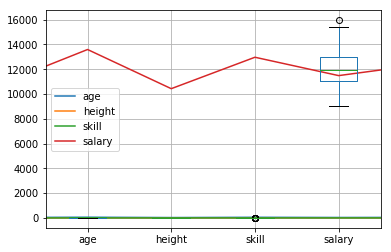

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
mdf.plot()
mdf.boxplot()

```Save the result as a csv```

In [0]:
f= open("employees.csv","w")
mdf.to_csv(f)

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

378
10516.828082191782
9478.5
0    0
dtype: int64
288138.5714285714


Fireplaces
0    690
1    650
2    115
3      5
Name: FullBath, dtype: int64

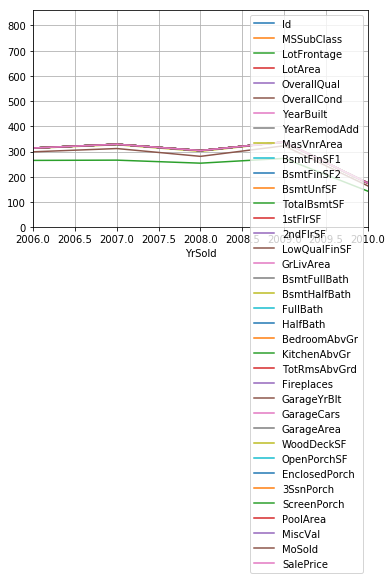

In [28]:
print(df['YearBuilt'].idxmax())
#print(df.groupby('YearBuilt').df['SalePrice'])
print(df['LotArea'].mean())
print(df['LotArea'].median())
print(df['Fireplaces'].mode())
print(df['SalePrice'].loc[df['PoolArea'] != 0].mean())
df.groupby('YrSold').count().plot()
df['OverallCond'].hist()
df.groupby('Fireplaces')['SalePrice'].mean()
2019-df.groupby('Fireplaces')['YearBuilt'].mean()
df.groupby('Fireplaces')['FullBath'].count()
df.groupby('Fireplaces')['FullBath'].count()

## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')

```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [30]:

df2 = pd.DataFrame()
df2['LotAreaMeters'] = pd.Series(0.0929*df['LotArea'], index=df.index)
df2['TotFlrSf'] = pd.Series(df['1stFlrSF']+df['2ndFlrSF'], index=df.index)
df2['GarageLength'] = pd.Series(df['GarageArea'] ** 0.5, index=df.index)
df2['AreaPerPerson'] = pd.Series(df['LotArea'] / (df['BedroomAbvGr']+1), index=df.index)
df2['AreaRank'] = pd.Series(df['LotArea'].rank(), index=df.index)
df2[pd.get_dummies(df['LotConfig']).columns] = pd.get_dummies(df['LotConfig'])
df2 = df2.join(df['SalePrice'])
df2

,LotAreaMeters,TotFlrSf,GarageLength,AreaPerPerson,AreaRank,Corner,CulDSac,FR2,FR3,Inside,SalePrice
0,785.0050,1710,23.409400,2112.500000,510.5,0,0,0,0,1,208500
1,891.8400,1262,21.447611,2400.000000,767.5,0,0,1,0,0,181500
2,1045.1250,1786,24.657656,2812.500000,1051.5,0,0,0,0,1,223500
3,887.1950,1717,25.337719,2387.500000,745.0,1,0,0,0,0,140000
4,1324.7540,2198,28.913665,2852.000000,1310.0,0,0,1,0,0,250000
5,1311.2835,1362,21.908902,7057.500000,1299.0,0,0,0,0,1,143000
6,936.8036,1694,25.219040,2521.000000,853.5,0,0,0,0,1,307000
7,964.4878,2090,22.000000,2595.500000,907.5,1,0,0,0,0,200000
8,568.5480,1774,21.633308,2040.000000,216.5,0,0,0,0,1,129900
9,689.3180,1077,14.317821,2473.333333,349.5,1,0,0,0,0,118000


## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [32]:
split = train_test_split(df2)
test = split[1]
train = split[0]
linr = LinearRegression()
trainData = train.drop('SalePrice', axis=1)
linr.fit(trainData, train['SalePrice'])

#trainData["Inside"]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [0]:
from sklearn.linear_model import Ridge
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_special.csv')

In [34]:
df2 = pd.DataFrame()
df2['LotAreaMeters'] = pd.Series(0.0929*df['LotArea'], index=df.index)
df2['LotAreaMeters2'] = pd.Series(df2['LotAreaMeters']**2)
df2['LotAreaMeters3'] = pd.Series(df2['LotAreaMeters']**3)
df2['TotFlrSf'] = pd.Series(df['1stFlrSF']+df['2ndFlrSF'], index=df.index)
df2['TotFlrSf2'] = pd.Series(df2['TotFlrSf']**2)
df2['TotFlrSf3'] = pd.Series(df2['TotFlrSf']**3)
df2['GarageLength'] = pd.Series(df['GarageArea'] ** 0.5, index=df.index)
df2['garageLength2'] = pd.Series(df2['GarageLength']**2)
df2['garageLength3'] = pd.Series(df2['GarageLength']**3)
df2['AreaPerPerson'] = pd.Series(df['LotArea'] / (df['BedroomAbvGr']+1), index=df.index)
df2['AreaPerPerson2'] = pd.Series(df2['AreaPerPerson']**2)
df2['AreaPerPerson3'] = pd.Series(df2['AreaPerPerson']**3)
df2['AreaRank'] = pd.Series(df['LotArea'].rank(), index=df.index)
df2['AreaRank2'] = pd.Series(df2['AreaRank']**2)
df2['AreaRank3'] = pd.Series(df2['AreaRank']**3)
df2 = df2.join(df['SalePrice'])
split = train_test_split(df2)
test = split[1]
train = split[0]
trainData = train.drop('SalePrice', axis=1)
trainloss = []
testloss = []
#train['SalePrice'].values
#train['SalePrice'].reshape(-1, 1)
for i in range(1,30):
  ridgy = Ridge(alpha=i)
  pricelist = []
  for lst in train['SalePrice'].reshape(-1, 1):
    pricelist.append(lst[0])
  trainloss += mean_squared_error(ridgy.fit(trainData, train['SalePrice']).predict(pricelist), train['SalePrice'].values)
#trainloss

AttributeError: ignored